
# 💖 Modeling Dynamics of Love

The core idea is to represent the intensity of feeling each person has for the other as a variable that changes over time. We use a system of **coupled differential equations** to describe this change.

## 💑 The Variables

*   $R(t)$: Romeo's love (or hate) for Juliet at time $t$.
    *   $R > 0$: Love 🥰
    *   $R < 0$: Hate 😠
*   $J(t)$: Juliet's love (or hate) for Romeo at time $t$.
    *   $J > 0$: Love 😍
    *   $J < 0$: Hate 😡

## 📝 The Equations

The rate of change of each person's feeling is influenced by their own current feeling and the feeling of their partner. A general linear model looks like this:

$$
\frac{dR}{dt} = aR + bJ
$$

$$
\frac{dJ}{dt} = cR + dJ
$$

Where $a, b, c, d$ are **coupling coefficients** that represent their personality types and how they react to love:

| Coefficient | Meaning |
| :--- | :--- |
| $a$ | Romeo's reaction to his *own* feelings (self-reliance). |
| $b$ | Romeo's reaction to *Juliet's* feelings (responsiveness). |
| $c$ | Juliet's reaction to *Romeo's* feelings (responsiveness). |
| $d$ | Juliet's reaction to her *own* feelings (self-reliance). |

By changing these coefficients, we can model different relationship types, like "Cautious Lovers," "Eager Beavers," or "Hermits" 🐢.

---

# 🚀 The Solution Method: RK4

Since these differential equations are often complex and don't have simple analytical solutions, we use numerical methods like the **Fourth-Order Runge-Kutta (RK4) method** to approximate the solution over time.

RK4 is a powerful tool for stepping forward in time to find the next value of $R$ and $J$ based on their current values and the rates of change ($\frac{dR}{dt}$ and $\frac{dJ}{dt}$).

## 🔢 The RK4 Formula

If we have a general differential equation $\frac{dy}{dt} = f(t, y)$, the RK4 method calculates the next value $y_{i+1}$ from the current value $y_i$ using a weighted average of four estimates of the slope ($k_1, k_2, k_3, k_4$):

$$
y_{i+1} = y_i + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$

Where $h$ is the time step:

1.  $k_1 = h \cdot f(t_i, y_i)$ (Slope at the start)
2.  $k_2 = h \cdot f(t_i + \frac{h}{2}, y_i + \frac{k_1}{2})$ (Slope at the midpoint, using $k_1$)
3.  $k_3 = h \cdot f(t_i + \frac{h}{2}, y_i + \frac{k_2}{2})$ (Slope at the midpoint, using $k_2$)
4.  $k_4 = h \cdot f(t_i + h, y_i + k_3)$ (Slope at the end, using $k_3$)

## 🔄 Applying RK4 to Love Dynamics

Since we have *two* coupled equations ($\frac{dR}{dt}$ and $\frac{dJ}{dt}$), we must calculate four $k$ values for $R$ and four $k$ values for $J$ in parallel for each time step.

For a time step $h$, the new values $R_{i+1}$ and $J_{i+1}$ are calculated as:

$$
R_{i+1} = R_i + \frac{1}{6}(k_{R1} + 2k_{R2} + 2k_{R3} + k_{R4})
$$

$$
J_{i+1} = J_i + \frac{1}{6}(k_{J1} + 2k_{J2} + 2k_{J3} + k_{J4})
$$

This process is repeated iteratively to trace the trajectory of their feelings over time, showing whether they end up in a stable, loving relationship, a cycle of ups and downs, or mutual destruction 💔.

| Case | a   | b  | c   | d  | R(0) | J(0) |
|------|-----|----|-----|----|------|------|
| 1    | -5  | 6  | 9   | 4  | 2    | 1.5  |
| 2    | -5  | 6  | -9  | 4  | 2    | 1.5  |
| 3    | -5  | 6  | -9  | -4 | 2    | 1.5  |
| 4    | 0   | 5  | -5  | 0  | -2   | 1.5  |
| 5    | 0   | 5  | 5   | 0  | -2   | 1.5  |

## Function to Solve ODE using RK4 Method

In [231]:
# Fixed-step RK4 integrator for a 2-variable system
def RK4_integrate(t_1, t_f, N, R_0, J_0, h, R_prime_func=None, J_prime_func=None):
    """
    Fixed-step RK4 integrator that returns (steps, R_values, J_values).

    Parameters:
    - t_1, t_f: start and end times
    - N: max number of steps
    - R_0, J_0: initial conditions
    - h: step size
    - R_prime_func, J_prime_func: optional derivative functions; if None,
      global `R_prime` and `J_prime` will be used (if defined).

    Returns: (steps_list, R_list, J_list)
    """
    # Resolve derivative functions (prefer passed-in functions)
    if R_prime_func is None or J_prime_func is None:
        R_prime_func = R_prime if 'R_prime' in globals() else R_prime_func
        J_prime_func = J_prime if 'J_prime' in globals() else J_prime_func

    t = t_1
    R = R_0
    J = J_0
    n = 0

    # local lists (pure function style)
    steps_local = [t]
    R_vals = [R]
    J_vals = [J]

    while (n < N) and (t < t_f):
        # RK4 coefficients (system of two equations)
        k1_R = h * R_prime_func(t, R, J)
        k1_J = h * J_prime_func(t, R, J)

        k2_R = h * R_prime_func(t + h/2, R + k1_R/2, J + k1_J/2)
        k2_J = h * J_prime_func(t + h/2, R + k1_R/2, J + k1_J/2)

        k3_R = h * R_prime_func(t + h/2, R + k2_R/2, J + k2_J/2)
        k3_J = h * J_prime_func(t + h/2, R + k2_R/2, J + k2_J/2)

        k4_R = h * R_prime_func(t + h, R + k3_R, J + k3_J)
        k4_J = h * J_prime_func(t + h, R + k3_R, J + k3_J)

        R_next = R + (k1_R + 2*k2_R + 2*k3_R + k4_R) / 6.0
        J_next = J + (k1_J + 2*k2_J + 2*k3_J + k4_J) / 6.0

        # advance and store locally
        t += h
        steps_local.append(t)
        R_vals.append(R_next)
        J_vals.append(J_next)

        R = R_next
        J = J_next
        n += 1

    # end while
    return steps_local, R_vals, J_vals


## Imports

In [232]:
import numpy as np

## Setup Case

In [233]:
# Helper function to set up and run any case
def setup_case(case_num, a, b, c, d, R_init, J_init):
    """
    Sets up a love dynamics case with given coefficients.
    Defines R_prime and J_prime for this case, resets data lists, and runs RK4.
    
    Parameters:
    - case_num: case identifier (1-5)
    - a, b, c, d: coefficients for dR/dt = aR + bJ, dJ/dt = cR + dJ
    - R_init, J_init: initial conditions
    """
    global R_prime, J_prime, R_1, J_1, R_2, J_2, R_3, steps
    
    # Define derivative functions for this case
    def R_prime(t, R, J):
        return a * R + b * J
    
    def J_prime(t, R, J):
        return c * R + d * J
    
    # Run integrator and capture returned lists (pure function)
    steps_ret, R_vals, J_vals = RK4_integrate(0.01, 25.0, 200, R_init, J_init, 0.01,
                                               R_prime_func=R_prime,
                                               J_prime_func=J_prime)

    # Assign globals used by plotting functions
    R_1 = list(R_vals)
    J_1 = list(J_vals)
    R_2 = list(R_vals)
    J_2 = list(J_vals)
    R_3 = [0.01] * len(steps_ret)
    steps = list(steps_ret)

    print(f"Case {case_num} setup complete. Ready to plot.")

## Time Evolution

In [234]:
def plot_time_evolution():
    """Plot Romeo and Juliet's feelings vs time."""
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.title("Love vs. Time Graph of Romeo's and Juliet's Feelings")
    plt.grid(True)
    
    plt.plot(steps, R_2, label="Romeo", linewidth=2)
    plt.plot(steps, J_2, label="Juliet", linewidth=2)
    
    plt.xlabel('t')
    plt.ylabel('Feelings')
    plt.legend()
    plt.show()

## Phase Portrait

In [235]:
def plot_phase_portrait():
    """Plot phase portrait (Romeo vs Juliet)."""
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 8))
    plt.title("Relationship of Romeo and Juliet's Feelings")
    plt.plot(R_2, J_2, linewidth=2)
    plt.xlabel('Romeo')
    plt.ylabel('Juliet')
    plt.grid(True)
    plt.show()

## Vector Field

In [236]:
def plot_vector_field(a, b, c, d):
    """
    Plot the vector field (direction field) for the ODE system.
    
    Parameters:
    - a, b, c, d: coefficients for dR/dt = aR + bJ, dJ/dt = cR + dJ
    """
    import matplotlib.pyplot as plt
    X, Y = np.meshgrid(np.linspace(-4, 4, 20), np.linspace(-4, 4, 20))
    U = a*X + b*Y
    V = c*X + d*Y
    
    fig = plt.figure(figsize=(10, 10))
    M = np.hypot(U, V)
    q = plt.quiver(X, Y, U, V, M, pivot='middle')
    ax = plt.gca()
    plt.title("Vector Field of Love Dynamics")
    plt.xlabel('Romeo')
    plt.ylabel('Juliet')
    plt.show()

# 💘 Case 1: The Explosive Reciprocators

| Case | $a$ | $b$ | $c$ | $d$ | $R(0)$ | $J(0)$ |
| :--- | :-: | :-: | :-: | :-: | :----: | :----: |
| 1 | $-5$ | $6$ | $9$ | $4$ | $2$ | $1.5$ |

## 🎭 Personalities

*   **Romeo ($a=-5, b=6$):** He is a **Cautious Reciprocator** 😌. The negative $a$ means his feelings naturally fade if left alone (he is self-dampening). However, the strong positive $b$ means he is highly responsive: the more Juliet loves him, the more he loves her.
*   **Juliet ($c=9, d=4$):** She is an **Eager Reciprocator** 😍. The positive $d$ means her feelings grow on their own (she is self-exciting). The very strong positive $c$ means she is extremely responsive: the more Romeo loves her, the more her love explodes.

## 📈 Relationship Dynamics

This is a recipe for **Explosive Love** 💥. Both partners are highly reciprocal, meaning they feed off each other's positive feelings. Juliet's self-exciting nature ($d=4$) acts as a powerful engine, driving her love up, which in turn fuels Romeo's love ($b=6$). Although Romeo is cautious ($a=-5$), the mutual positive feedback is so strong that their feelings will likely grow rapidly and without bound, leading to an intense, passionate, and potentially overwhelming relationship.


Case 1 setup complete. Ready to plot.


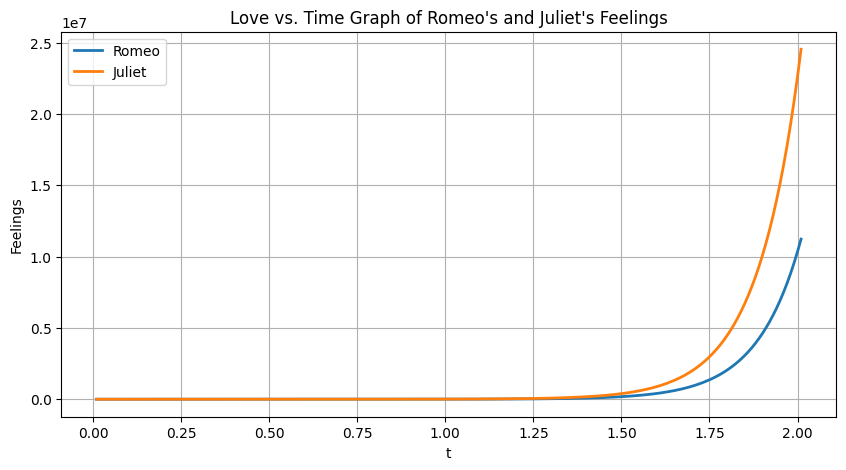

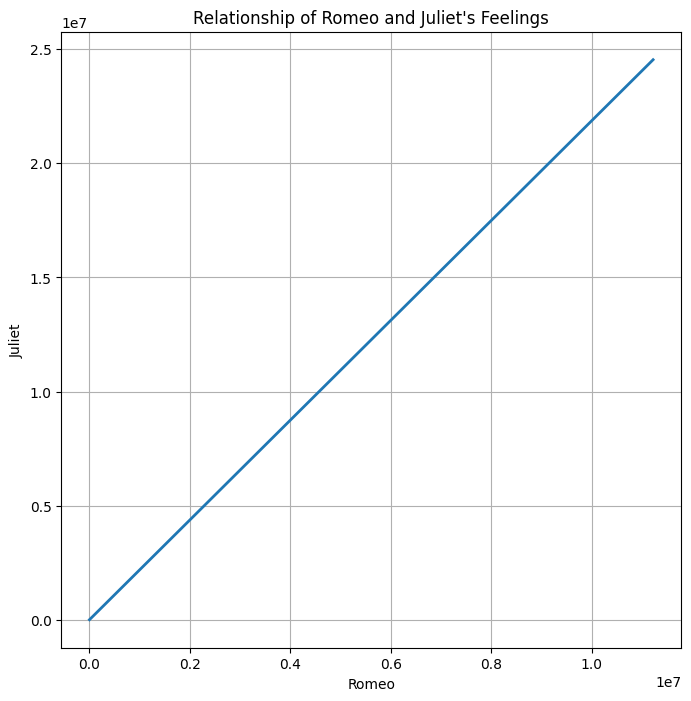

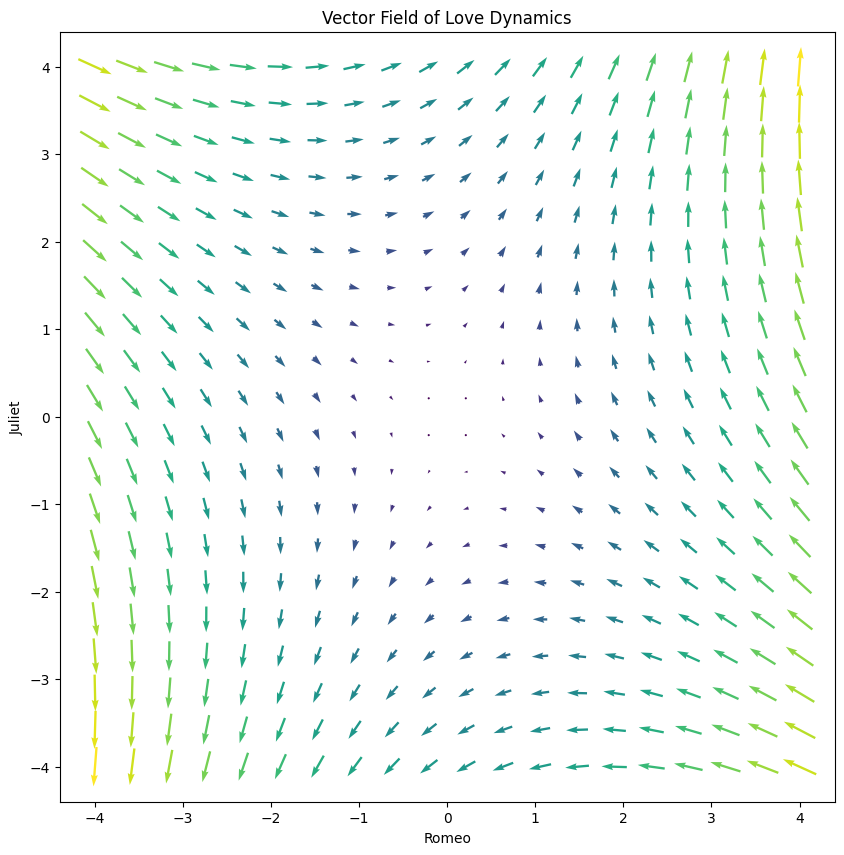

In [237]:
# Example usage for Case 1:
setup_case(1, -5, 6, 9, 4, 2.0, 1.5)
plot_time_evolution()
plot_phase_portrait()
plot_vector_field(-5, 6, 9, 4)

# 💔 Case 2: The Love-Hate Rollercoaster

| Case | $a$ | $b$ | $c$ | $d$ | $R(0)$ | $J(0)$ |
| :--- | :-: | :-: | :-: | :-: | :----: | :----: |
| 2 | $-5$ | $6$ | $-9$ | $4$ | $2$ | $1.5$ |

## 🎭 Personalities

*   **Romeo ($a=-5, b=6$):** Still the **Cautious Reciprocator** 😌. He needs Juliet's love to sustain his own.
*   **Juliet ($c=-9, d=4$):** She is a **Rebellious Eager Beaver** 😠. The positive $d$ means her feelings grow on their own. However, the highly negative $c$ means she is a **Rebel**: the more Romeo loves her, the more she *dislikes* him.

## 📈 Relationship Dynamics

This relationship is headed for a **Love-Hate Cycle** 🎢.
1.  Romeo loves Juliet (high $R$).
2.  Juliet, being a Rebel ($c=-9$), starts to hate Romeo (low $J$).
3.  Romeo, needing Juliet's love to sustain his own ($b=6$), starts to cool down (low $R$).
4.  Juliet, seeing Romeo's love fade, loses her reason to rebel, and her self-exciting nature ($d=4$) takes over, causing her to love him again (high $J$).
5.  The cycle repeats.

The relationship will likely oscillate, with both partners' feelings swinging wildly between love and hate, but the strong self-dampening and self-exciting forces might keep the relationship from completely collapsing or exploding.

Case 2 setup complete. Ready to plot.


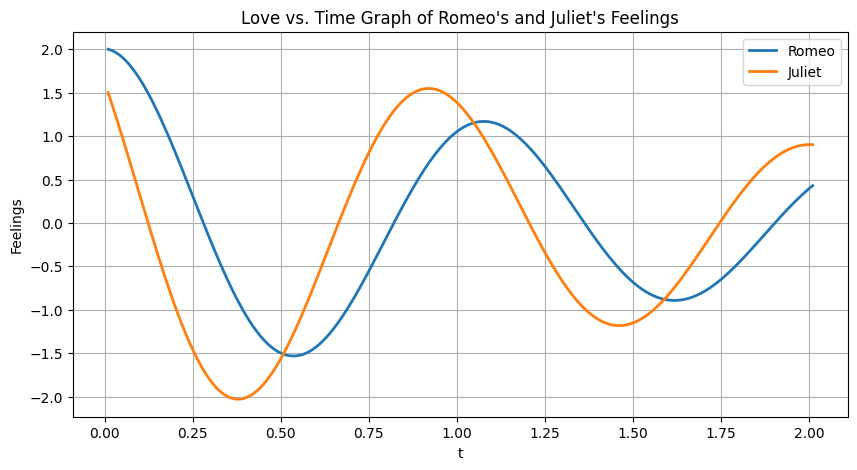

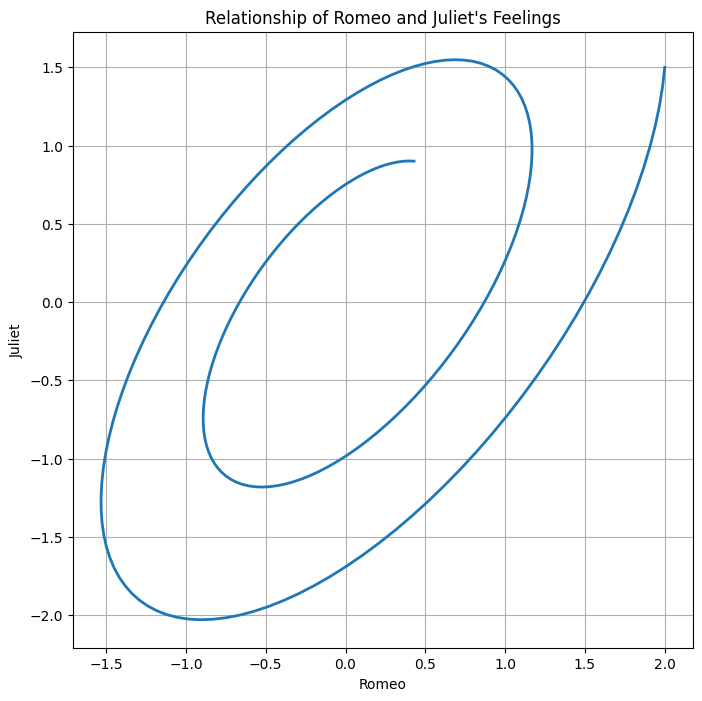

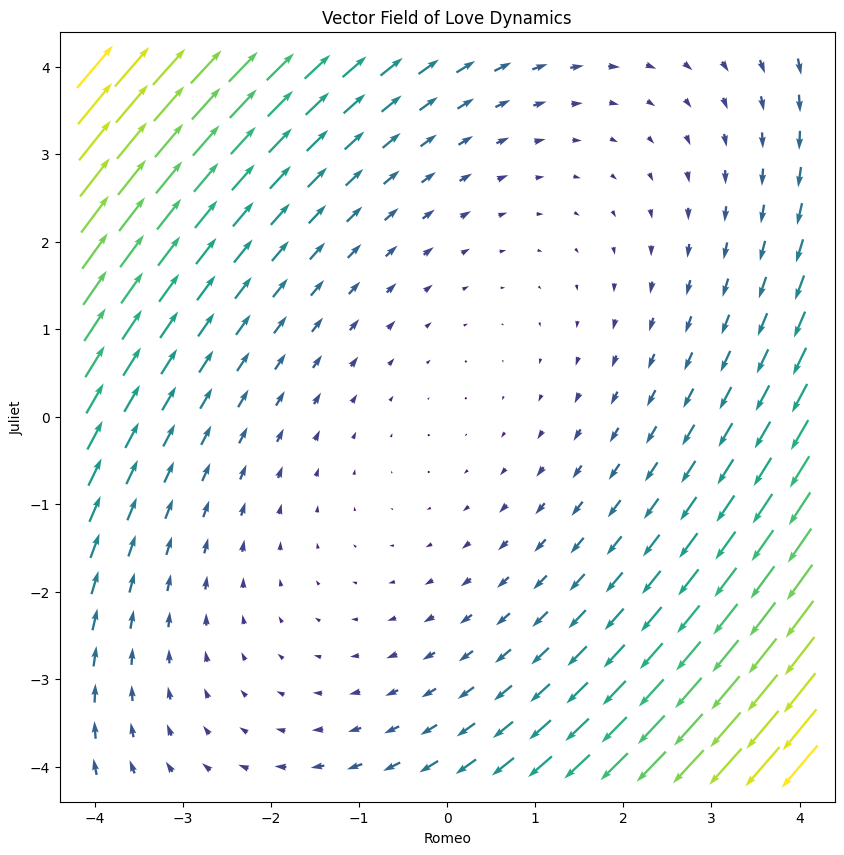

In [238]:
# Example usage for Case 2:
setup_case(2, -5, 6, -9, 4, 2.0, 1.5)
plot_time_evolution()
plot_phase_portrait()
plot_vector_field(-5, 6, -9, 4)

# 🥶 Case 3: The Mutual Destruction

| Case | $a$ | $b$ | $c$ | $d$ | $R(0)$ | $J(0)$ |
| :--- | :-: | :-: | :-: | :-: | :----: | :----: |
| 3 | $-5$ | $6$ | $-9$ | $-4$ | $2$ | $1.5$ |

## 🎭 Personalities

*   **Romeo ($a=-5, b=6$):** **Cautious Reciprocator** 😌.
*   **Juliet ($c=-9, d=-4$):** She is a **Rebellious Hermit** 🙅‍♀️. The negative $d$ means her feelings naturally fade (self-dampening). The highly negative $c$ means she is a strong **Rebel**: Romeo's love pushes her away.

## 📈 Relationship Dynamics

This is a path to **Mutual Destruction** 💀. Both partners are self-dampening ($a<0, d<0$), meaning their feelings naturally decay.
1.  Romeo loves Juliet, but she rebels ($c=-9$), causing her feelings to drop quickly.
2.  As Juliet's love drops, Romeo's love also drops ($b=6$).
3.  Since both partners are also self-dampening, there is no internal force to stop the decay.

The initial positive feelings will quickly spiral down into mutual indifference or hate, and the relationship will rapidly approach the origin ($R=0, J=0$), leading to a swift and complete breakup.

Case 3 setup complete. Ready to plot.


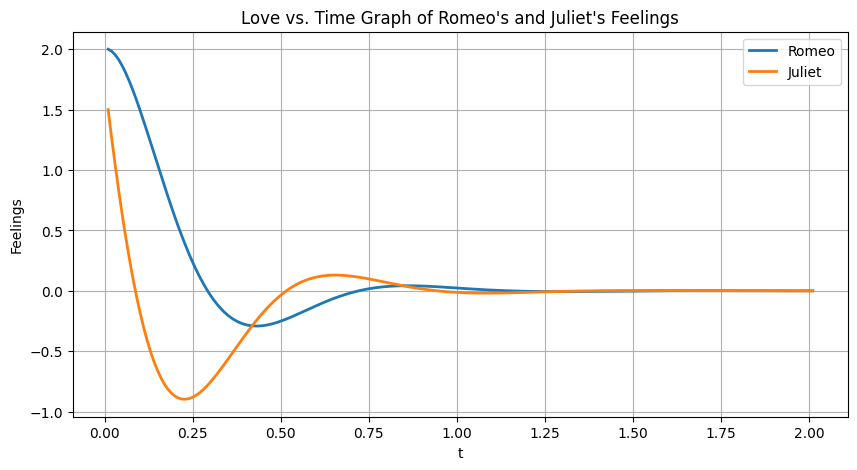

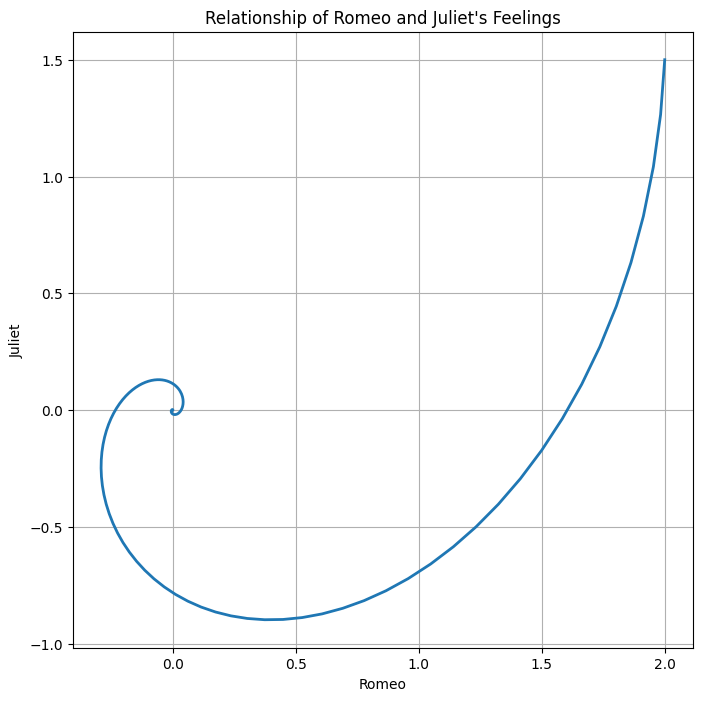

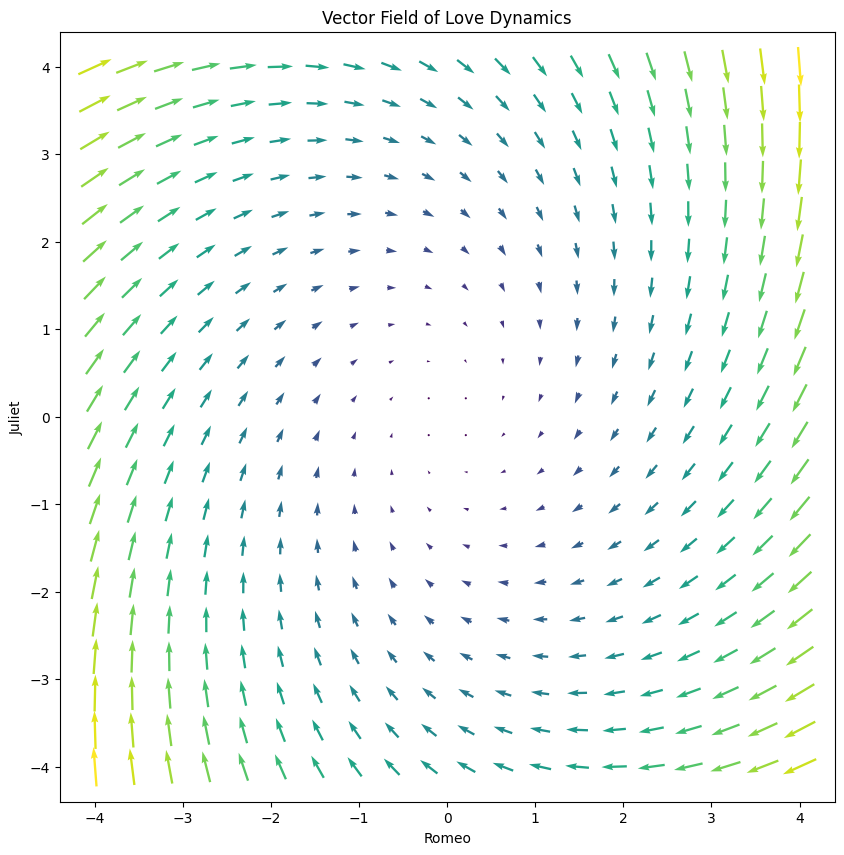

In [239]:
# Example usage for Case 3:
setup_case(3, -5, 6, -9, -4, 2.0, 1.5)
plot_time_evolution()
plot_phase_portrait()
plot_vector_field(-5, 6, -9, -4)

# 🌊 Case 4: The Unrequited Cycle

| Case | $a$ | $b$ | $c$ | $d$ | $R(0)$ | $J(0)$ |
| :--- | :-: | :-: | :-: | :-: | :----: | :----: |
| 4 | $0$ | $5$ | $-5$ | $0$ | $-2$ | $1.5$ |

## 🎭 Personalities

*   **Romeo ($a=0, b=5$):** He is a **Pure Reciprocator** 🤷‍♂️. His feelings don't change on their own ($a=0$), but he is highly responsive to Juliet's feelings ($b=5$).
*   **Juliet ($c=-5, d=0$):** She is a **Pure Rebel** 😈. Her feelings don't change on their own ($d=0$), but she is highly rebellious to Romeo's feelings ($c=-5$).

## 📈 Relationship Dynamics

This is the classic **Unrequited Love Cycle** 🔄. The relationship is driven entirely by the interaction between the two, with no self-influence.
1.  Romeo's feelings are driven by Juliet's love ($\frac{dR}{dt} = 5J$).
2.  Juliet's feelings are driven by Romeo's hate ($\frac{dJ}{dt} = -5R$).

Since Romeo starts with hate ($R(0)=-2$) and Juliet starts with love ($J(0)=1.5$), the system will enter a stable, non-decaying cycle. Their feelings will continuously chase each other in a circle:
*   Romeo's hate makes Juliet love him more.
*   Juliet's love makes Romeo love her.
*   Romeo's love makes Juliet hate him.
*   Juliet's hate makes Romeo hate her.
*   ...and back to the start.

This relationship will never settle down; it will forever be a dramatic, cyclical chase.

Case 4 setup complete. Ready to plot.


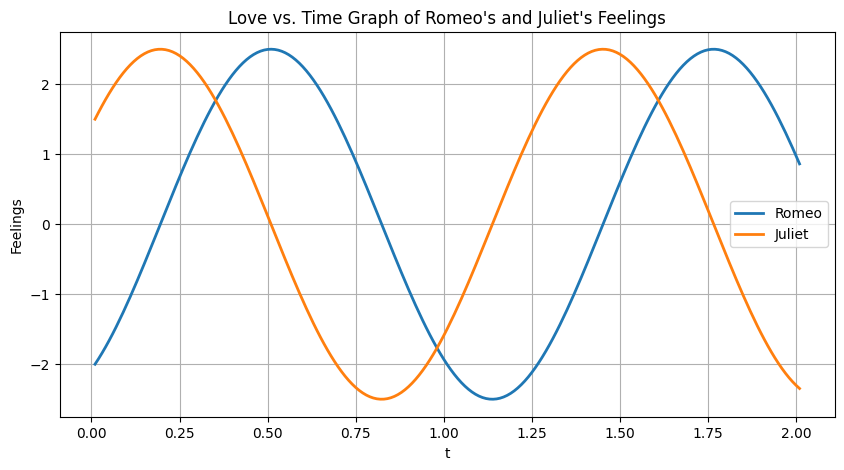

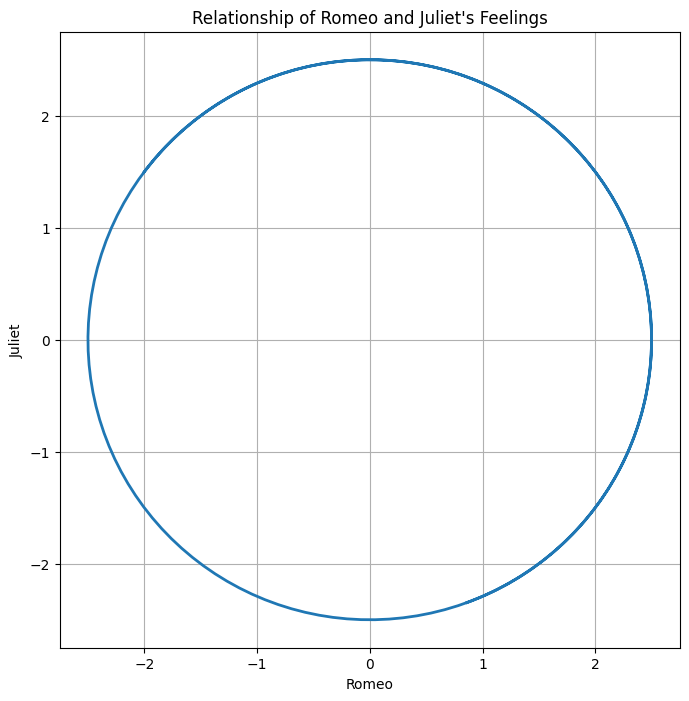

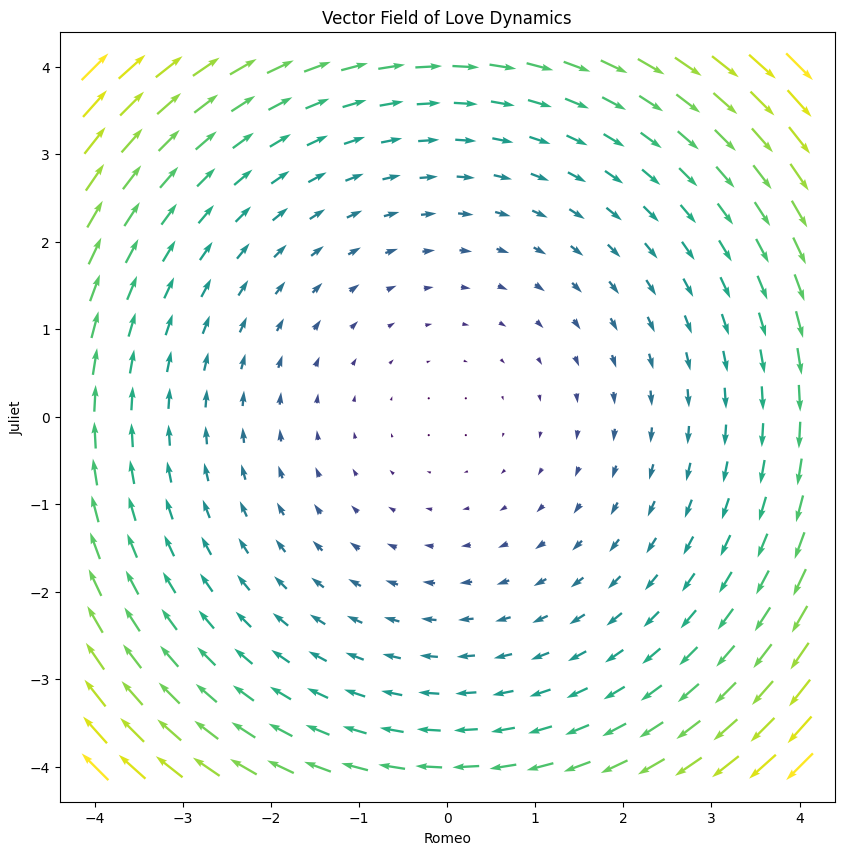

In [240]:
# Example usage for Case 4:
setup_case(4, 0, 5, -5, 0, -2.0, 1.5)
plot_time_evolution()
plot_phase_portrait()
plot_vector_field(0, 5, -5, 0)

# 🤝 Case 5: The Harmonious Cycle

| Case | $a$ | $b$ | $c$ | $d$ | $R(0)$ | $J(0)$ |
| :--- | :-: | :-: | :-: | :-: | :----: | :----: |
| 5 | $0$ | $5$ | $5$ | $0$ | $-2$ | $1.5$ |

## 🎭 Personalities

*   **Romeo ($a=0, b=5$):** **Pure Reciprocator** 🤷‍♂️.
*   **Juliet ($c=5, d=0$):** She is a **Pure Reciprocator** 😇. Her feelings don't change on their own ($d=0$), but she is highly responsive to Romeo's feelings ($c=5$).

## 📈 Relationship Dynamics

This is a **Harmonious Cycle** 💫. Both partners are pure reciprocators, meaning their feelings are entirely dependent on the other person's current feelings.
1.  Romeo's feelings are driven by Juliet's love ($\frac{dR}{dt} = 5J$).
2.  Juliet's feelings are driven by Romeo's love ($\frac{dJ}{dt} = 5R$).

Since they both start with mixed feelings ($R(0)=-2$ is hate, $J(0)=1.5$ is love), the system will enter a stable, non-decaying cycle, similar to Case 4, but the nature of the cycle is different. Their feelings will chase each other in a way that is always reinforcing:
*   Romeo's hate makes Juliet hate him (because $c=5$).
*   Juliet's hate makes Romeo hate her (because $b=5$).
*   This mutual hate will eventually turn into mutual love, and then back to hate.

The relationship will be a dramatic, cyclical dance between mutual love and mutual hate, never settling down, but also never spiraling out of control.

Case 5 setup complete. Ready to plot.


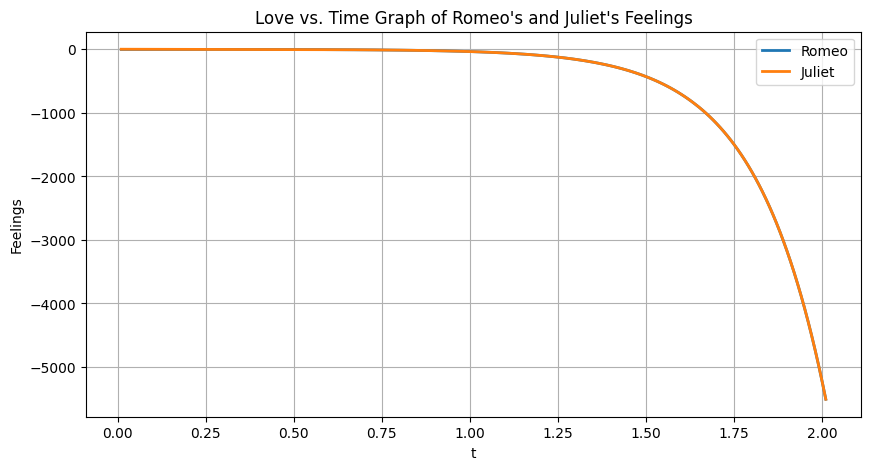

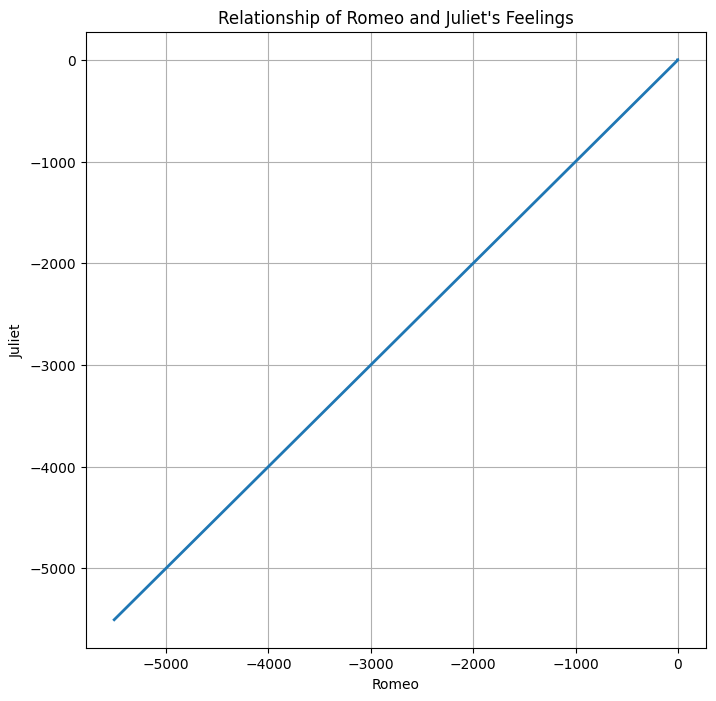

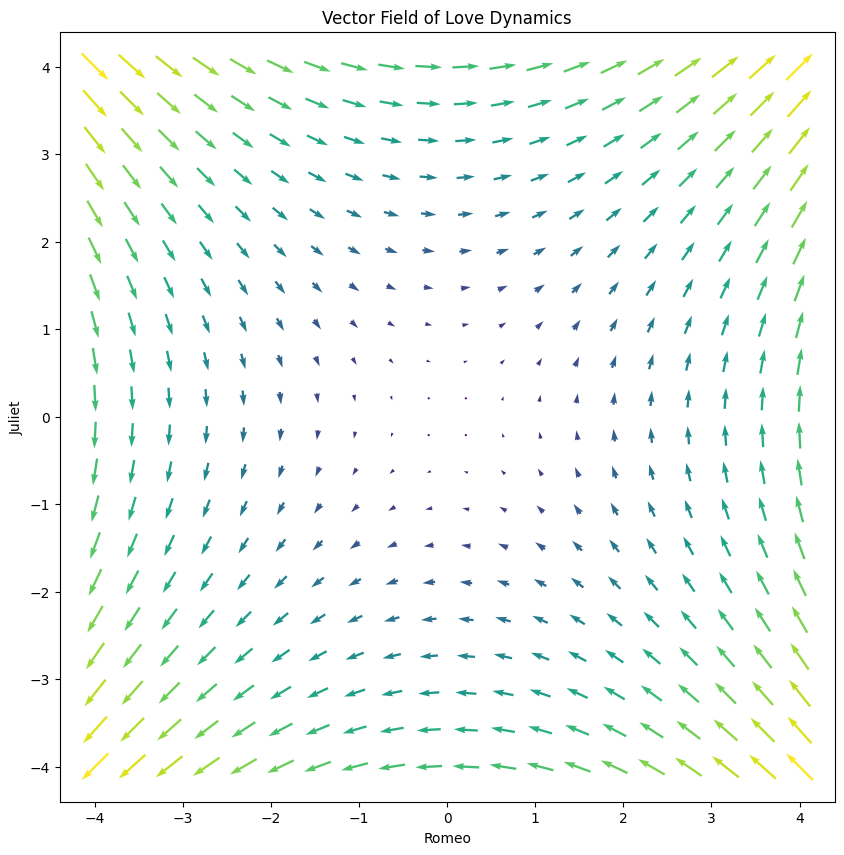

In [241]:
# Example usage for Case 5:
setup_case(5, 0, 5, 5, 0, -2.0, 1.5)
plot_time_evolution()
plot_phase_portrait()
plot_vector_field(0, 5, 5, 0)